<div class="alert alert-success">
    
**Комментарий ревьюера**

Привет, Анна! Меня зовут Сысоева Вера и я буду помогать тебе с этим проектом.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные и отмечены **#ок** - всё сделано правильно; жёлтые и отмечены **#можно лучше** - есть замечания, но не критично; красные с пометкой **#ошибка** - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

# Проект: Исследование стартапов

- Автор: Анна Курочкина.
- Дата: 14.06.2025

## Введение

### Цели и задачи проекта
- Цель проекта - подготовить датасет с информацией о стартапах и сделать выводы о релевантности применения данных для разработки модели бизнеса.
- Задачи проекта - познакомиться с данными, проверить их корректность, провести предобработку данных, исследовательский анализ данных и сформулировать выводы.

### Описание данных 
В проекте используются данные пяти датасетов с таким описанием:

Датасет `/datasets/acquisition.csv`содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

Датасет `/datasets/company_and_rounds.csv` содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

Датасет `/datasets/education.csv` содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

Датасет `/datasets/people.csv` содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

Датасет `/datasets/degrees.csv` содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

### Содержимое проекта
1. Знакомство с данными: загрузка и первичная предобработка.
2. Предобработка данных, предварительное исследование.
3. Исследовательский анализ объединённых таблиц.
4. Итоговый вывод и рекомендации.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Здорово, что ты начала проект с описания целей, задач и данных.

</div>


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

### 1.1. Вывод общей информации, исправление названий столбцов

Загрузим все данные по проекту, проведём первичное ознакомление с ними.

Начнём с загрузки библиотек и датасетов. 
Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в переменных:

In [1]:
# Импортируем библиотеку pandas
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Спасибо, что позаботилась об установке phik. Действительно такие нестандартные библиотеки стоит устанавливать

</div>

In [2]:
# Выгружаем данные в переменные acquisition_df, company_and_rounds_df, education_df, people_df, degrees_df
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Данные подгружены верно.

</div>

Познакомимся с данными пяти датасетов — выведем первые строки методом head(), а информацию о каждом датафрейме методом info():

In [3]:
# Выводим информацию о датафрейме acquisition_df
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [4]:
# Выводим первые строки датафрейма acquisition_df на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Датасет acquisition_df содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:

- В данных имеются следующие виды значений:

- **Строковые данные (object).** Два столбца имеют тип данных object: term_code и acquired_at. Они содержат категориальную информацию о вариантах расчёта и о дате совершения сделки. Для информации о вариантах расчёта тип подобран верно, а для даты совершения сделки лучше изменить тип данных для работы с датой временем.
- **Целочисленные значения (int64).** Четыре столбца имеют целочисленный тип данных: id (идентификатор покупки), acquiring_company_id (идентификатор покупающей компании), acquired_company_id (идентификатор покупаемой компании), price_amount (сумма сделки). Для дальнейшей работы такой тип данных является подходящим.

- Названия столбцов соответствуют содержащейся в них информации.
- Стиль написания названий столбцов не требует корректировки (представлен как snake_case).
- Значения в столбцах соответствуют своему описанию.
- Пропуски содержатся в столбцах term_code, acquired_at.

Теперь познакомимся с данными датасета company_and_rounds_df.

In [5]:
# Выводим информацию о датафрейме company_and_rounds_df
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [6]:
# Выводим первые строки датафрейма company_and_rounds_df на экран
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Датасет company_and_rounds_df содержит 22 столбца и 217774 строки, в которых представлена информация о  компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие выводы:

- В данных имеются следующие виды значений:

- **Строковые данные (object).** Десять столбцов имеют тип данных object. Для столбцов name, category code, status, domain, network  username, country  code, funding  round  type тип подобран верно. Для столбцов founded  at, closed  at, funded  at лучше изменить тип данных для работы с датой и временем. 
- **Числовые значения с плавающей запятой (float64).** Двенадцать столбцов имеют тип данных float64. Для столбцов company ID, investment  rounds,  funding  rounds, funding  round  id, company  id, participants, milestones, funding  total и raised  amount лучше заменить тип данных на целочисленный тип (int64).  Столбцы is  first  round и is  last  round являются категориальными и содержат значения 0 и 1, следовательно, их лучше привести к целочисленному типу. 

- Названия столбцов соответствуют содержащейся в них информации.
- Стиль написания названий столбцов требует корректировки (следует привести к виду snake_case).
- Значения в столбцах соответствуют своему описанию.
- Пропуски содержатся во всех 22 столбцах.

Теперь познакомимся с данными датасета education_df.

In [7]:
# Выводим информацию о датафрейме education_df
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [8]:
# Выводим первые строки датафрейма education_df на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Датасет education_df содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудников компаний. 

После первичного анализа данных можно сделать следующие выводы:

- В данных имеются следующие виды значений:
- **Строковые данные (object).** Два столбца имеют тип данных object. Для столбца instituition (название учебного заведения) тип данных подобран верно. Для столбца graduated_at лучше изменить тип данных для работы с датой и временем.
- **Целочисленные значения (int64).** Два столбца имеют тип данных int64: id и person_id, в которых содержится информация об идентификаторе записи об образовании и об идентификаторе работника. Для этих столбцов тип данных подобран верно. 

- Названия столбцов соответствуют содержащейся в них информации.
- Стиль написания названий столбцов не требует корректировки (представлен как snake_case).
- Значения в столбцах соответствуют своему описанию.
- Пропуски содержатся в 2 столбцах из 4.

Теперь познакомимся с данными датасета people_df.

In [9]:
# Выводим информацию о датафрейме people_df
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [10]:
# Выводим первые строки датафрейма people_df на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Датасет people_df содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках компаний. 

После первичного анализа данных можно сделать следующие выводы:

- В данных имеются следующие виды значений:

- **Строковые данные (object).** Три столбца имеют тип данных object. Для столбцов first_name (имя сотрудника), last_name (фамилия сотрудника) и network_username (ник в социальных сетях) тип подобран верно. 
- **Целочисленные значения (int64).** Один столбец имеет тип данных int64: id, в котором содержится информация об идентификаторе сотрудника. Тип данных подобран верно. 
- **Числовые значения с плавающей запятой (float64).** Один столбец имеет тип данных float64: company_id, в котром содержится информация об идентификаторе компании. Тип данных лучше привести к типу int64.

- Названия столбцов соответствуют содержащейся в них информации.
- Стиль написания названий столбцов не требует корректировки (представлен как snake_case).
- Значения в столбцах соответствуют своему описанию.
- Пропуски содержатся в 2 столбцах из 5.

Теперь познакомимся с данными датасета degrees_df.

In [11]:
# Выводим информацию о датафрейме degrees_df
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [12]:
# Выводим первые строки датафрейма degrees_df на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Датасет degrees_df содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудника. 

После первичного анализа данных можно сделать следующие выводы:

- В данных имеются следующие виды значений:

- **Строковые данные (object).** Три столбца имеют тип данных object. Данные столбца object_id, в котором содержится информация об идентификаторе сотрудника, лучше привести к типу int64. Для столбцов degree_type (тип образования), subject (специальность) тип подобран верно. 
- **Целочисленные значения (int64).** Один столбец имеет тип данных int64: id, в котором содержится информация об идентификаторе записи. Тип данных подобран верно. 

- Названия столбцов соответствуют содержащейся в них информации.
- Стиль написания названий столбцов не требует корректировки (представлен как snake_case).
- Значения в столбцах соответствуют своему описанию.
- Пропуски содержатся в 2 столбцах из 4.


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Ты верно посмотрела общее описание загруженных данных, основные проблемы обозначены. Правильно, что ты подробно описала каждую таблицу.

</div>

### 1.2. Смена типов и анализ пропусков

На основе первичного ознакомления с данными на предыдущем этапе было принято решение о необходимости смены типов данных. Также необходимо провести анализ пропусков в данных.

Начнём с обработки данных датафрейма acquisition_df.

In [13]:
# Заменим тип данных столбца acquired_at на тип данных datetime64[ns]
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], format='%Y-%m-%d', errors='coerce')
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [14]:
# Выводим первые строки датафрейма acquisition_df на экран для оценки результата преобразования данных 
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [15]:
# Проверяем полные дубликаты в датафрейме acquisition_df
acquisition_df.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [16]:
# Проверяем неявные дубликаты в датафрейме acquisition_df
acquisition_df.duplicated(subset='id').sum()

0

Каждая строка соответствует уникальному значению идентификатора покупки.

Проверим корректность использования категориальных значений в столбце term_code.

In [17]:
# Выводим уникальные значения вариантов расчёта на экран для поиска неявных дубликатов
unique_term_code = acquisition_df['term_code'].unique()
print(unique_term_code)

[nan 'cash' 'stock' 'cash_and_stock']


Неявных дубликатов в датафрейме acquisition_df не обнаружено.

In [18]:
# Считаем количество пропусков в каждом столбце в абсолютном значении
acquisition_df.isna().sum() 

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [19]:
# Считаем количество пропусков в относительном значении ко всем строкам датафрейма (в процентах)
acquisition_df_isna = acquisition_df.isna().mean() * 100
acquisition_df_isna.sort_values()

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
price_amount             0.000000
acquired_at              0.308281
term_code               80.535771
dtype: float64


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Правильно, что ты смотришь процент пропусков. Лучше делать округление, не линиться добавлять round или в начале проекта настройками добавить точность отображения чисел. Все же много знаков после запятой не нужно обычно, а считываемость снижается.
</div>

Тип данных для даты был успешно перобразован из типа object в тип datetime64[ns]. В датафрейме acquisition_df пропуски содержатся в двух столбцах: acquired_at (дата сделки, 0.3% пропусков) и term_code (варианты расчёта, 80.5% пропусков). В столбце acquired_at благодаря параметру errors='coerce' все пропуски были представлены как NaT, что облегчает расчёт и позволяет сделать фильтрацию данных при необходимости. Эти данные на следующих тапах также можно удалить, что не повлечёт за собой значительного искажения данных. Удалять пропуски в столбце term_code нельзя, так как это повлечёт за собой исключение большого массива данных. Заменять пропуски на наиболее часто встречающееся значение также не рекомендуется, так как мы получим значительное искажение данных после проведения анализа.

Попробуем предположить, почему возникли пропуски в данных. 

In [20]:
# Выводим 50 строк датафрейма acquisition_df на экран 
acquisition_df.head(15)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
5,11,227,228,NaN,7140000,2003-08-05
6,12,5,230,cash,0,2007-07-01
7,14,318,314,cash,0,2006-10-01
8,15,20,333,stock,1500000000,2002-07-08
9,16,342,341,cash,350000000,2007-08-01



<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Все же смотреть 50 строк обычно избыточно и немного перегружает проект, лучше подумать какую агрегацию, выборку или расчет можно показать, чтобы подкрепить свои слова или проверить свои предположения.
    
</div>

Вероятнее всего, пропуски в данных столбца term_code относятся к типу MNAR - имеется определённая закономерность, согласно которой у многих компаний отсуствует информация о вариантах расчёта, однако на основе имеющихся данных мы не можем указать точную причину отсутствия данных. Для столбца acquired_at (дата сделки) вероятнее всего характерны типы пропусков MNAR или MCAR - пропуски из-за обстоятельств, которые не представлены в данных, или случайные пропуски. 

Таким образом, для дальнейшего анализа мы обнаружили недостаточно данных в столбце term_code датафрейма acquisition_df, поэтому при работе с этими данными необходимо учитывать, что результат не даст точного представления о вариантах расчёта для компаний в процессе финансирования. 

Примечательно, что для многих сделок сумма сделки равна 0. Этот факт требует дальнейшего детального анализа.

In [21]:
# Проводим фильтрацию, выделяем сделки, где price_amount (сумма сделки) = 0
acquisition_df_amount0 = acquisition_df[(acquisition_df['price_amount'] == 0)]
acquisition_df_amount0.info()
acquisition_df_amount0.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6931 entries, 6 to 9403
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    6931 non-null   int64         
 1   acquiring_company_id  6931 non-null   int64         
 2   acquired_company_id   6931 non-null   int64         
 3   term_code             640 non-null    object        
 4   price_amount          6931 non-null   int64         
 5   acquired_at           6905 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 379.0+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
6,12,5,230,cash,0,2007-07-01
7,14,318,314,cash,0,2006-10-01
13,20,377,100,cash,0,2005-05-29
15,23,307,306,cash,0,2007-08-07
21,30,541,542,cash,0,2006-01-01



<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Отличный инсайт, молодец, важно подмечать такие моменты, особенно в проектах, для которых не будет такого подробного списка вопросов.
</div>

6931 компания из 9407 компаний была продана за 0 у.е. Это более половины всех компаний, о которых есть информация в датафрейме acquisition_df. Так как выживаемость стартапов, согласно статистике, в целом очень низкая, предполагается, что это разорившиеся стартапы, которые перешли во владение других компаний, или объединение двух компаний. Также есть предположение, что это ошибки в данных. 

Переходим к работе с датафреймом company_and_rounds_df.

In [22]:
# Выводим на экран названия столбцов датафрейма company_and_rounds_df
company_and_rounds_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [23]:
# Два столбца будут иметь одинаковые названия после преобразования. Изменим названия столбцов
company_and_rounds_df = company_and_rounds_df.rename(columns={'company  ID': 'company_id_1', 'company  id': 'company_id_2'})


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Верно, что  ты переименовала эти столбцы, чтобы не получилось дублирования после перевода в змеиный регистр. Но уже можно было предположить, что у нас две таблицы, которые мы ниже будем разделять. Одна таблица - компании, вторая - раунды. Можно было назвать столбцы уже с оглядкой на это, а не просто индексами.
    
</div>

In [24]:
# Приводим названия столбцов к стилю snake_case 
company_and_rounds_df.columns = company_and_rounds_df.columns.str.lower().str.replace(r"\s+", "_", regex=True)

In [25]:
# Проверяем результат переименования названий столбцов
company_and_rounds_df.columns

Index(['company_id_1', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [26]:
# Заменим тип данных столбцов founded_at, closed_at, funded_at на тип данных datetime64[ns]
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'], format='%Y-%m-%d', errors='coerce')
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'], format='%Y-%m-%d', errors='coerce')
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'], format='%Y-%m-%d', errors='coerce')
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_1         217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Да, типы данных верно заменены.

Даты - это основной источник проблем с типами данных. Иногда приходится менять и другие типы, то даты почти всегда будут в неподходящем формате при выгрузке из БД.
    
Верно, что ты посмотрела результаты методом info, иногда при замене типов у небольшого количества столбцов удобнее использовать dtypes.
    
    
</div>

In [27]:
# Проверяем полные дубликаты в датафрейме company_and_rounds_df
company_and_rounds_df.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [28]:
# Проверяем неявные дубликаты в датафрейме company_and_rounds_df
company_and_rounds_df.duplicated(subset='company_id_1').sum()

21220

В столбце с указанием идентификатора компании нашлось 21220 дубликатов. Предварительно делаем вывод о том, что это не ошибка, а указание на несколько этапов финансирования, в которых компания принимала участие. Данные требуют дальнейшего анализа.  

In [29]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['name', 'category_code', 'status', 'domain', 'country_code', 'is_first_round', 'is_last_round']:
    print(f'Уникальные значения в столбце {column}:')
    print(company_and_rounds_df[column].sort_values().unique())
    print()

Уникальные значения в столбце name:
['! Haz Life' '!mpossible'
 '!nterprise Network Services - US West Communications' ... 'Übermind'
 'óga' nan]

Уникальные значения в столбце category_code:
['advertising' 'analytics' 'automotive' 'biotech' 'cleantech' 'consulting'
 'design' 'ecommerce' 'education' 'enterprise' 'fashion' 'finance'
 'games_video' 'government' 'hardware' 'health' 'hospitality' 'legal'
 'local' 'manufacturing' 'medical' 'messaging' 'mobile' 'music' 'nanotech'
 'network_hosting' 'news' 'nonprofit' 'other' 'pets' 'photo_video'
 'public_relations' 'real_estate' 'search' 'security' 'semiconductor'
 'social' 'software' 'sports' 'transportation' 'travel' 'web' nan]

Уникальные значения в столбце status:
['acquired' 'closed' 'ipo' 'operating' nan]

Уникальные значения в столбце domain:
['0-6.com' '011now.com' '01com.com' ... 'zzwolf.com' 'zzzzapp.com' nan]

Уникальные значения в столбце country_code:
['AFG' 'AGO' 'AIA' 'ALB' 'AND' 'ANT' 'ARA' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS'
 'AUT

Неявных дубликатов в столбцах 'name', 'category_code', 'status', 'domain', 'country_code', 'is_first_round', 'is_last_round' датафрейма company_and_rounds_df не обнаружено.

In [30]:
# Считаем количество пропусков в каждом столбце в абсолютном значении
company_and_rounds_df.isna().sum() 

company_id_1              302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_2           164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [31]:
# Считаем количество пропусков в относительном значении ко всем строкам датафрейма (в процентах)
company_and_rounds_df_isna = company_and_rounds_df.isna().mean() * 100
company_and_rounds_df_isna.sort_values()

company_id_1            0.138676
milestones              0.138676
funding_total           0.138676
investment_rounds       0.138676
funding_rounds          0.138676
status                  0.138676
name                    0.138676
domain                 32.425818
category_code          33.928752
founded_at             49.509124
country_code           50.128574
network_username       56.131586
funding_round_id       75.695905
participants           75.695905
pre_money_valuation    75.695905
raised_amount          75.695905
is_last_round          75.695905
company_id_2           75.695905
is_first_round         75.695905
funding_round_type     75.695905
funded_at              75.809784
closed_at              98.416248
dtype: float64

В каждом столбце датафрейма встречаются пропуски. В семи столбцах company_id, milestones, funding_total, investment_rounds, funding_rounds, status, name доля пропусков одинакова и составляет 0.14%. Самый большой процент пропусков содержится в столбце closed_at (дата закрытия компании), что, вероятнее всего, относится к типу MNAR - имеется определённая закономерность, согласно которой у многих компаний отсутствует информация о дате закрытия, однако на основе имеющихся данных мы не можем указать точную причину отсутствия данных.

Переходим к работе с датафреймом education_df.

In [32]:
# Заменим тип данных столбца graduated_at на тип данных datetime64[ns]
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], format='%Y-%m-%d', errors='coerce')
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [33]:
# Проверяем полные дубликаты в датафрейме education_df
education_df.duplicated().sum()

0

Явных дубликатов не обнаружено. 

In [34]:
# Проверяем неявные дубликаты в датафрейме education_df
education_df.duplicated(subset='id').sum()

0

Каждая строка соответствует уникальному значению идентификатора записи об образовании.

In [35]:
# Проверяем неявные дубликаты в датафрейме education_df в столбце person_id
education_df.duplicated(subset='person_id').sum()

41159

В столбце с указанием уникального номера сотрудника встречаются 41159 дублирующихся записей. Предполагаем, что у этих сотрудников имеется несколько образований. Используем эту информацию для анализа на следующих этапах исследования.

Проверим пропуски в датафрейме education_df.

In [36]:
# Считаем количество пропусков в каждом столбце в абсолютном значении
education_df.isna().sum() 

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [37]:
# Считаем количество пропусков в относительном значении ко всем строкам датафрейма (в процентах)
education_df_isna = education_df.isna().mean() * 100
education_df_isna.sort_values()

id               0.000000
person_id        0.000000
instituition     0.050178
graduated_at    47.035854
dtype: float64

Тип данных в датафрейме education_df был успешно преобразован. 47% пропусков содержится в столбце с информацией о дате окончания учебного заведения сотрудником. Это большое количество пропусков, и они требуеют дальнейшего анализа. Вероятно, пропуски в данных соедржатся потому, что сотрудники не закончили учебное заведение. Поэтому пропуски, скорее всего, относятся к типу MNAR - имеется определённая закономерность, согласно которой у многих компаний отсутствует информация о дате выпуска сотрудника из учебного заведения, однако на основе имеющихся данных мы не можем указать точную причину отсутствия данных.

Переходим к работе с датафреймом people_df.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Ты отлично проанализировала попуски в данных. 
    
</div>

In [38]:
# Проверяем полные дубликаты в датафрейме people_df
people_df.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [39]:
# Проверяем неявные дубликаты в датафрейме people_df
people_df.duplicated(subset='id').sum()

1

Обнаружен один дубликат. Предположительно, сотрудник мог сменить место работы и перейти в другую компанию, поэтому в явных дубликатах эта информация не отобразилась. На данный момент оставим этот дубликат в датафрейме. 

In [40]:
# Считаем количество пропусков в каждом столбце в абсолютном значении
people_df.isna().sum() 

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [41]:
# Считаем количество пропусков в относительном значении ко всем строкам датафрейма (в процентах)
people_df_isna = people_df.isna().mean() * 100
people_df_isna.sort_values()

id                   0.000000
last_name            0.000441
first_name           0.002205
network_username    82.855996
company_id          84.731528
dtype: float64

84.7% пропусков содержится в столбце с информацией о компании, в которой работает сотрудник, и 82.9% пропусков содержится в столбце о никнейме в социальных сетях сотрудника. Это большое количество пропусков. Для дальнейшей работы нам необходимо учитывать тот факт, что информацию о месте работы сотрудников мы получим неполную. Возможно, что некоторая информация о сотрудниках и их месте работы является неизвестной, потому что они уже ушли из компании. Никнеймы в социальных сетях могли отсутствовать, так как эта информация не являлась обязательной при трудоустройстве, или же основная информация о сотрудниках заносилась в тот период, когда социальных сетей не было. Поэтому пропуски, скорее всего, относятся к типу MNAR - имеется определённая закономерность, согласно которой у многих сотрудников отсутствует информация о компании, в которой они работают, и о никнеймах, однако на основе имеющихся данных мы не можем указать точную причину отсутствия данных.

Переходим к работе с датафреймом degrees_df.

In [42]:
# Проверяем полные дубликаты в датафрейме degrees_df
degrees_df.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [43]:
# Проверяем неявные дубликаты в датафрейме degrees_df
degrees_df.duplicated(subset='id').sum()

0

Каждая строка соответствует уникальному значению идентификатора записи.

In [44]:
# Проверяем неявные дубликаты в датафрейме degrees_df в столбце object_id
degrees_df.duplicated(subset='object_id').sum()

41159

41159 дубликатов обнаружено в столбце с указанием уникального номера сотрудника. Столько же дубликатов было однаружено в столбце person_id датафрейма education_df. Данные требуют дальнейшего анализа.

In [45]:
# Проверяем неявные дубликаты в датафрейме degrees_df
degrees_df.duplicated(subset='id').sum()

0

In [46]:
# Считаем количество пропусков в каждом столбце в абсолютном значении
degrees_df.isna().sum() 

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [47]:
# Считаем количество пропусков в относительном значении ко всем строкам датафрейма (в процентах)
degrees_df_isna = degrees_df.isna().mean() * 100
degrees_df_isna.sort_values()

id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64

10% пропусков содержится в столбце о типе образования и 25.8% в столбце о специальности. Пропуски могут быть связаны с тем, что сотрудник не имеет образования, либо не закончил обучение. Пропуски, скорее всего, относятся к типу MNAR - имеется определённая закономерность, согласно которой у многих сотрудников отсутствует о типе образования и специальности, однако на основе имеющихся данных мы не можем указать точную причину отсутствия данных.

На данном этапе первичное ознакомление с данными и их первичный анализ завершены. Для датафреймов, необходимых для работы, были произведены замены типов даных, проанализированы пропуски и сделаны выводы о причине их возникновения, выявлены явные и неявные дубликаты. 

Для решения задач проекта данных, в целом, достаточно в каждом из датафреймов. Исключение составляет датафрейм с информацией об образовании сотрудников - в нём встречается более 80% пропусков в информации о принадлежности сотрудника к определённой компании. Возможно, пропуски возникли после увольнения сотрудников из этих компаний. В любом случае данные о наличии или отсутствии образования у сотрудников стартапов будут собраны на основе только 15,3% данных.

Переходим к этапу предобработки данных.

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Также стоит проверить и все таблицы на наличе пропусков, а также явных и неявных дубликатов.

После этого давай ответим на вопрос: "Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта."
    
</div>


<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Да, все верно. Несмотря на прблемы в данных, самих столбцов, а также их наполненности вполне достаточно для ответа на поставленные вопросы.
    
</div>

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года будет указан:
- типичный размер средств, выделяемый в рамках одного раунда;
- общее количество раундов финансирования за этот год.

In [48]:
# Выбираем данные без пропусков в столбце funded_at
new_company_and_rounds_df = company_and_rounds_df.dropna(subset=['funded_at'])
new_company_and_rounds_df.head()

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,...,3.0,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,...,4.0,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

В целом это не обязательно, можно не делать новую таблицу, а работать с существующей.

</div>

In [49]:
# Создаём новый столбец year, где будет указан год финансирования
new_company_and_rounds_df['year'] = new_company_and_rounds_df['funded_at'].dt.year
new_company_and_rounds_df.head()

/tmp/ipykernel_67/4113164986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_company_and_rounds_df['year'] = new_company_and_rounds_df['funded_at'].dt.year


,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,...,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0,2008
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,...,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0,2008


In [50]:
# Изучаем статистические показатели столбца raised_amount
print('Статистические показатели столбца raised_amount:')
new_company_and_rounds_df['raised_amount'].describe()

Статистические показатели столбца raised_amount:


count    5.268000e+04
mean     7.967552e+06
std      4.225021e+07
min      0.000000e+00
25%      2.500000e+05
50%      1.600000e+06
75%      6.800000e+06
max      3.835050e+09
Name: raised_amount, dtype: float64

Показатель стандартного отклонения значений высокий. Среднее значение суммы финансирования и мода различаются, поэтому при использовании среднего значения мы рискуем получить ошибки в анализе данных. Для типичного размера финансирования будем искать моду значений. 

In [51]:
# Создаём сводную таблицу и считаем типичный размер средств и общее количество раундов финансирования за год
print('Типичный размер выделяемых средств и количество раундов финансирования за год:')
pivot_funded = pd.pivot_table(new_company_and_rounds_df, index="year", values="raised_amount", aggfunc=['median', 'count'])
print(pivot_funded)

Типичный размер выделяемых средств и количество раундов финансирования за год:
            median         count
     raised_amount raised_amount
year                            
1960           0.0             9
1973           0.0             1
1974           0.0             2
1984       41000.0             3
1985           0.0             1
1987     1250000.0             2
1989       15000.0             1
1990     1000000.0             1
1992     2000000.0             1
1993       62500.0             2
1994     6700000.0             2
1995     2000000.0             7
1996       12500.0             7
1997     3300000.0             9
1998      100000.0            29
1999     2000000.0            76
2000     4200000.0           125
2001     3000000.0            96
2002     4200000.0           116
2003     3000000.0           159
2004     5000000.0           291
2005     5500000.0          1633
2006     5000000.0          2436
2007     3973320.0          3279
2008     3110000.0          37

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Верно, что ты рассматриваешь медиану в качестве типичного значения
</div>

In [52]:
# Выводим названия столбцов сводной таблицы для фильтрации данных
pivot_funded.columns

MultiIndex([('median', 'raised_amount'),
            ( 'count', 'raised_amount')],
           )

In [53]:
# Проводим фильтрацию данных, где количество раундов финансирования в год превосходит 50 раундов
pivot_funded_filtered = pivot_funded[pivot_funded['count', 'raised_amount'] > 50]
print(pivot_funded_filtered)

            median         count
     raised_amount raised_amount
year                            
1999     2000000.0            76
2000     4200000.0           125
2001     3000000.0            96
2002     4200000.0           116
2003     3000000.0           159
2004     5000000.0           291
2005     5500000.0          1633
2006     5000000.0          2436
2007     3973320.0          3279
2008     3110000.0          3774
2009     2000000.0          4151
2010     1602500.0          6221
2011     1200000.0          9204
2012     1000000.0          9970
2013     1200000.0         11072


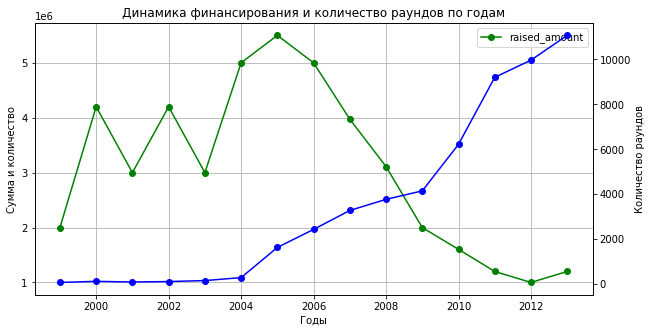

In [54]:
# Строим линейный график
pivot_funded_filtered.plot(kind='line', 
                           y='median', 
                           figsize=(10, 5),
                           color='green',
                           marker='o')

# Подписываем и отображаем график   
plt.title('Динамика финансирования и количество раундов по годам')
plt.xlabel('Годы')
plt.ylabel('Сумма и количество')
plt.grid(True)

ax2 = plt.twinx()
ax2.plot(
    pivot_funded_filtered.index,
    pivot_funded_filtered['count'],
    marker='o',
    color='blue'
)
ax2.set_ylabel('Количество раундов')

plt.show()

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

График очень наглядно построен. Здорово, что ты отобразила и количество раундов и объем финансирования 
</div>

В 2005 году типичный размер суммы финансирования в рамках одного раунда составлял 5500000 у.е. Это максимальный показатель за всё время. С течением времени видно, что количество операций финансирования растёт, но типичная сумма за один раунд финансирования значительно сокращается (рекордный минимум был в 2012 году и составлял 1000000 у.е.). В 2013 году в рамках одного финансирования выделяли 1200000 у.е., что чуть больше, чем в 2012 году. В целом, это самые низкие суммы за всё время, но количество раундов финансирвоания значительно увеличилось и достигло пика к 2013 году - с 76 раундов в 1999 году до 11072 раундов в 2013 году. 

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Все верно. Как итог можно заключить, что происходит "дробление" финансирования, т.е. уменьшение объемов за счет увеличения количества раундов.
</div>


### 2.2. Люди и их образование

Оценим полноту представленной информации об образовании сотрудников. Используем датасеты `people.csv`, `education.csv` и `degrees.csv`. 

In [55]:
# Очистим датафреймы education.csv и degrees.csv от неявных дубликатов, так как нам достаточно одного сведений об одном образовании сотрудника
cleaned_education_df = education_df.drop_duplicates(subset=['person_id'])
cleaned_degrees_df = degrees_df.drop_duplicates(subset=['object_id'])

In [56]:
# Считаем количество пропусков в каждом столбце датафрейма people_df в абсолютном значении
people_df.isna().sum()

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [57]:
# Считаем количество пропусков датафрейма people_df в относительном значении ко всем строкам датафрейма (в процентах)
people_df_isna = people_df.isna().mean() * 100
people_df_isna.sort_values()

id                   0.000000
last_name            0.000441
first_name           0.002205
network_username    82.855996
company_id          84.731528
dtype: float64

В данных датасета people_df содержится большое количество пропусков в столбцах network_username и company_id. Первый столбец не исказит данные об образовании сотрудников, однако большой процент пропусков во втором столбце будет ограничивать выборку в данных, так как сложно будет определить размер компании, в которой работает сотрудник без уникального номера компании. Значит, около 84.7% данных не будут проанализированы. Полученные данные нельзя считать однозначно достоверными.

In [58]:
# Считаем количество пропусков датафрейма cleaned_education_df в каждом столбце в абсолютном значении
cleaned_education_df.isna().sum()

id                  0
person_id           0
instituition       41
graduated_at    31809
dtype: int64

In [59]:
# Считаем количество пропусков датафрейма cleaned_education_df в относительном значении ко всем строкам датафрейма (в процентах)
cleaned_education_df_isna = cleaned_education_df.isna().mean() * 100
cleaned_education_df_isna.sort_values()

id               0.000000
person_id        0.000000
instituition     0.059897
graduated_at    46.469737
dtype: float64

В данных датасета education_df содержится 46% пропусков в столбце graduated_at (дата выпуска из образовательного учреждения), что будет использоваться нами как признак того, что сотрудник не закончил обучение и не имеет образования. 

In [60]:
# Проведём объединение датафреймов people_df и cleaned_education_df. Для how установим параметр 'left'
df_education = people_df.merge(cleaned_education_df, left_on='id', right_on='person_id', how='left') 
df_education.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [61]:
# Выводим информацию об объединённом датафрейме 
df_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226709 entries, 0 to 226708
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              226709 non-null  int64         
 1   first_name        226704 non-null  object        
 2   last_name         226708 non-null  object        
 3   company_id        34615 non-null   float64       
 4   network_username  38867 non-null   object        
 5   id_y              68071 non-null   float64       
 6   person_id         68071 non-null   float64       
 7   instituition      68031 non-null   object        
 8   graduated_at      36387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 17.3+ MB


Присоединим к объединённому датафрему df_education датафрейм cleaned_degrees_dff. Перед присоединением приведём данные столбца object_id датафрейма cleaned_degrees_df к целочисленному типу данных.

In [62]:
# Меняем формат уникального номера сотрудника и преобразовываем его в целочисленный тип
cleaned_degrees_df['object_id'] = cleaned_degrees_df['object_id'].str.replace('p:', '').astype(int)
cleaned_degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68451 entries, 0 to 109608
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           68451 non-null  int64 
 1   object_id    68451 non-null  int64 
 2   degree_type  61747 non-null  object
 3   subject      51097 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


/tmp/ipykernel_67/1455820729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_degrees_df['object_id'] = cleaned_degrees_df['object_id'].str.replace('p:', '').astype(int)


In [63]:
# Проведём объединение датафреймов df_education и cleaned_degrees_df. Для how установим параметр 'left'
df_education_degrees = df_education.merge(cleaned_degrees_df, left_on='id_x', right_on='object_id', how='left') 
df_education_degrees.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,2415.0,10.0,NaN,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Таблицы верно объединены.
    
Но для просмотра результата лучше использовать head() или tail(). Также для вывода таблицы не стоит использоват print. Либо просто пользуйся автоматическим выводом последней строки кода в ячейке, либо используй display. 
</div>

In [64]:
# Выводим информацию о полученном датафрейме на экран
df_education_degrees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226709 entries, 0 to 226708
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              226709 non-null  int64         
 1   first_name        226704 non-null  object        
 2   last_name         226708 non-null  object        
 3   company_id        34615 non-null   float64       
 4   network_username  38867 non-null   object        
 5   id_y              68071 non-null   float64       
 6   person_id         68071 non-null   float64       
 7   instituition      68031 non-null   object        
 8   graduated_at      36387 non-null   datetime64[ns]
 9   id                68071 non-null   float64       
 10  object_id         68071 non-null   float64       
 11  degree_type       61401 non-null   object        
 12  subject           50808 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memor

In [65]:
# Проверяем неявные дубликаты в датафрейме df_education_degrees в столбце id_x
df_education_degrees.duplicated(subset='id_x').sum()

1

Обнаружен один дубликат. Удалим его.

In [66]:
# Очистим датафрейм df_education_degrees от неявного дубликата
df_education_degrees = df_education_degrees.drop_duplicates(subset=['id_x'])

In [67]:
# Считаем количество пропусков в каждом столбце датафрейма df_education_degrees в абсолютном значении
df_education_degrees.isna().sum()

id_x                     0
first_name               5
last_name                1
company_id          192094
network_username    187841
id_y                158637
person_id           158637
instituition        158677
graduated_at        190321
id                  158637
object_id           158637
degree_type         165307
subject             175900
dtype: int64

In [68]:
# Считаем количество пропусков d датафрейме df_education_degrees в относительном значении ко всем строкам датафрейма (в процентах)
df_education_degrees_isna = df_education_degrees.isna().mean() * 100
df_education_degrees_isna.sort_values()

id_x                 0.000000
last_name            0.000441
first_name           0.002205
id_y                69.974152
person_id           69.974152
id                  69.974152
object_id           69.974152
instituition        69.991796
degree_type         72.916262
subject             77.588793
network_username    82.855920
graduated_at        83.949839
company_id          84.731902
dtype: float64

После объединения данных большой процент пропусков всё также присутствует в данных: для 84% сотрудников не указана информация об уникальном номере компании, в которой работает человек. Для 83% сотрудников не указан год выпуска из образовательного учреждения. Для 77% не указаны изучаемые предметы, для 72% нет информации об уровне образования и для 69% нет указания названия образовательного учреждения. 

Посчитаем количество сотрудников для известных нам компаний. 

In [69]:
# Создаём сводную таблицу и считаем количество сотрудников в разных компаниях
print('Количество сотрудников в компаниях:')
pivot_person = pd.pivot_table(df_education_degrees, index="company_id", values="id_x", aggfunc='count')

print(pivot_person)

Количество сотрудников в компаниях:
            id_x
company_id      
1.0            2
2.0            1
3.0            3
4.0           13
5.0           61
...          ...
285897.0       2
285953.0       1
285972.0       2
285996.0       1
286091.0       6

[22921 rows x 1 columns]


In [70]:
# Выводим статистические показатели для сводной таблицы pivot_person
pivot_person['id_x'].describe()

count    22921.000000
mean         1.510144
std          2.764379
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
Name: id_x, dtype: float64

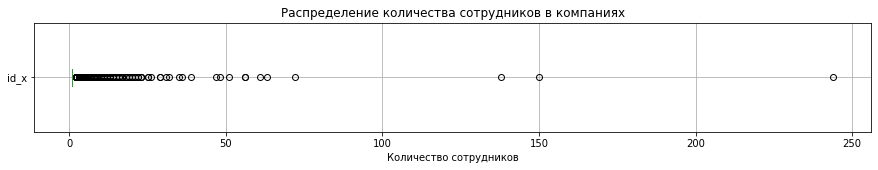

In [71]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 2))

# Строим диаграмму размаха значений в столбце id_x
pivot_person.boxplot(column='id_x', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества сотрудников в компаниях')
plt.xlabel('Количество сотрудников')

# Выводим график
plt.show()

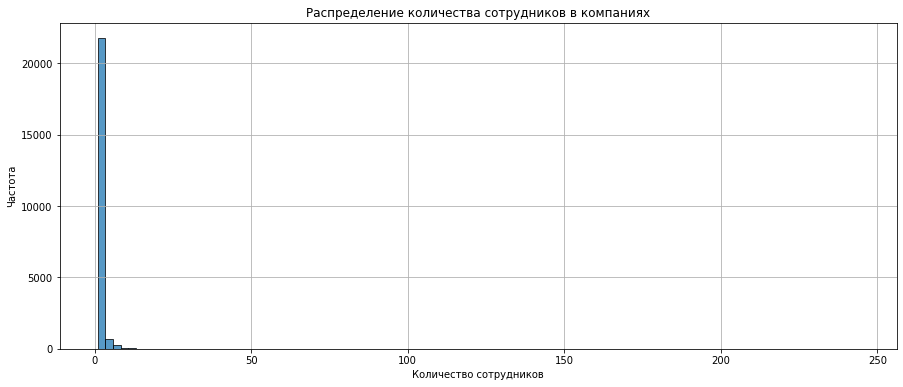

In [72]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
pivot_person['id_x'].plot(
                kind='hist', # Тип графика - гистограмма
                bins = 100,
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение количества сотрудников в компаниях')
plt.xlabel('Количество сотрудников')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Чаще всего информации о сотрудниках компаний указано мало: мода количества сотрудников - 1 человек, среднее значение - 1 человек. Стандартное отклонение равно 2. 75-й персентиль равен 1. 

Выведем остальные персентили (после 70-го персентиля, так как он нам известен и мы знаем, что он не отличается от 25-го и 50-го персентиля), чтобы оценить, насколько быстро растёт показатель количества сотрудников в компаниях.

In [73]:
# Считаем распределение количества сотрудников, используя персентили с шагом в 10
eightieth_percentile = pivot_person['id_x'].quantile(0.8)
eightieth_percentile

2.0

In [74]:
ninetieth_percentile = pivot_person['id_x'].quantile(0.9)
ninetieth_percentile

2.0

In [75]:
ninety_fifth_percentile = pivot_person['id_x'].quantile(0.95)
ninety_fifth_percentile

4.0

In [76]:
ninety_nine_percentile = pivot_person['id_x'].quantile(0.99)
ninety_nine_percentile

8.0

In [77]:
hundredth_percentile = pivot_person['id_x'].quantile(1)
hundredth_percentile

244.0

Мы получили данные о восьмидесятом, девяностом, девяносто пятом, девяносто девятом и сотом персентилях. На основе полученных значений выделим категории предприятий: 
- Микропредприятие: численность персонала - 1 сотрудник.
- Малое предприятие: численность персонала - 2-3 сотрудника.
- Среднее предприятие: численность персонала - 4-7 сотрудников.
- Большое предприятие: численность персонала - 8-45 сотрудников.
- Крупное предприятие: численность персонала более 45 сотрудников (на основе анализа выбросов).

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#шибка**

Ты хорошо посмотрела распределение людей по компаниям. Но вот в итоге разделение на группы ты сделала не совсем подходящим для полученного тобой распределения.
    
Давай в итоге посмотрим, как у нас люди/компании распределились по группам? Не получится ли, что мы сравниваем группу с 30 000 элементами и группу с 10 элементами? Это не очень хорошо для стат. анализа. 
    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Да, теперь разделение по группам более сбалансированное

</div>

In [78]:
# Разелим все компании на пять групп в зависимости от количества сотрудников ("Микропредприятие", "Малое предприятие", "Среднее предприятие", "Большое предприятие", Крупное предприятие"), при этом добавляем параметр right=True для включения правой границы интервала 
pivot_person['company'] = pd.cut(pivot_person['id_x'], bins=[0, 1, 3, 7, 45, 250], labels=["Микропредприятие", "Малое предприятие", "Среднее предприятие", "Большое предприятие", "Крупное предприятие"], right=True)
pivot_person

,id_x,company
company_id,,
1.0,2,Малое предприятие
2.0,1,Микропредприятие
3.0,3,Малое предприятие
4.0,13,Большое предприятие
5.0,61,Крупное предприятие
...,...,...
285897.0,2,Малое предприятие
285953.0,1,Микропредприятие
285972.0,2,Малое предприятие


Мы выделили 5 категорий для компаний. Нам всё ещё недостаёт информации о том, имеются ли сведения об образовании у сотрудников компаний. Создадим в датафрейме df_education_degrees новый столбец и укажем, есть информация об образовании сотрудников (0) или нет (1). 

Для создания этого столбца будем использовать информацию из столбцов 'instituition', 'graduated_at', 'degree_type', 'subject'. В информации об образовании сотрудников может быть указан институт ('instituition'), но не указана дата его окончания ('graduated_at'). Предполагаем, что в таком случае это указывает на то, что человек начинал обучение, но не закончил его. Из этапа анализа информации в объединённом датафрейме мы также знаем, что количество пропусков в столбце 'subject' превосходит количество пропусков в столбце 'degree_type', однако наличие информации в одном столбце не означает наличие информации в другом. 

Поэтому для определения отсутствия сведений об образовании у сотрудника мы будем использовать следующие данные: будем считать, что сотрудник получил образование, если для него указаны образовательное учреждение и дата выпуска, а также тип образования или специальность. 

In [79]:
# Используем функцию для проверки наличия образования у сотрудника: если в столбце instituition и graduated_at пропуски и в столбце degree_type или subject пропуски, то функция возвращает 1 (нет образования), если данные известны, то функция возвращает 0 (есть образование)
def check_columns(row):
    if (pd.notna(row['instituition']) and pd.notna(row['graduated_at'])) and (pd.notna(row['degree_type']) or pd.notna(row['subject'])):
        return 0
    else:
        return 1

df_education_degrees['not_education'] = df_education_degrees.apply(check_columns, axis=1)
df_education_degrees.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id,object_id,degree_type,subject,not_education
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,2415.0,10.0,NaN,Computer Science,1
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,1
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,1
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,1
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,1


<div class="alert alert-warning">
    
**Комментарий ревьюера - 3**

**#можно лучше**

Правильне было бы все условия соединить через ИЛИ, иначе очень жесткие условия получаются 
</div>

In [80]:
# Добавляем количество сотрудников без информации об образовании в таблицу pivot_person
# Добавляем столбец для вывода общего количества сотрудников в данной компании
pivot_person['not_education'] = df_education_degrees.groupby('company_id')['not_education'].sum()
pivot_person['all_person'] = df_education_degrees.groupby('company_id')['not_education'].count()
print(pivot_person)

            id_x              company  not_education  all_person
company_id                                                      
1.0            2    Малое предприятие              2           2
2.0            1     Микропредприятие              0           1
3.0            3    Малое предприятие              1           3
4.0           13  Большое предприятие              3          13
5.0           61  Крупное предприятие             37          61
...          ...                  ...            ...         ...
285897.0       2    Малое предприятие              2           2
285953.0       1     Микропредприятие              1           1
285972.0       2    Малое предприятие              2           2
285996.0       1     Микропредприятие              1           1
286091.0       6  Среднее предприятие              4           6

[22921 rows x 4 columns]


In [81]:
# Группируем категории компаний по количеству сотрудников без образования 
group_person_education = pivot_person.groupby('company')['not_education'].sum()
print(group_person_education)

company
Микропредприятие       10599
Малое предприятие       5112
Среднее предприятие     3093
Большое предприятие     1965
Крупное предприятие      584
Name: not_education, dtype: int64


In [82]:
# Группируем категории компаний по количеству сотрудников в целом
group_all_person = pivot_person.groupby('company')['all_person'].sum()
print(group_all_person)

company
Микропредприятие       18116
Малое предприятие       8181
Среднее предприятие     4513
Большое предприятие     2818
Крупное предприятие      986
Name: all_person, dtype: int64


In [83]:
# Делим количество сотрудников без образования на общее количество сотрудников для вычисления доли сотрудников без образования
result = group_person_education/group_all_person 
result_df = result.reset_index(name='result')
print(result_df)

               company    result
0     Микропредприятие  0.585063
1    Малое предприятие  0.624862
2  Среднее предприятие  0.685353
3  Большое предприятие  0.697303
4  Крупное предприятие  0.592292


<Figure size 1152x576 with 0 Axes>

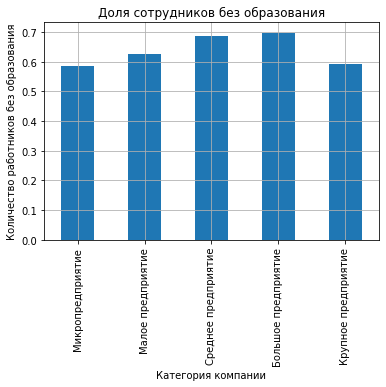

In [84]:
# Создаём визуализацию 
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
result_df.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               x='company', 
               y='result',
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Доля сотрудников без образования'
)

# Настраиваем оформление графика
plt.xlabel('Категория компании')
plt.ylabel('Количество работников без образования')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Технически хорошо все выполнено. Но сами результаты могут немного поменяться после перераспределения групп.
</div>

Вывод: в больших предприятиях (8-45 сотрудников) доля сотрудников без образования самая большая (69.7%). Самая маленькая доля сотрудников без образования приходится на микропредприятие (1 сотрудник, 58.5% сотрудников без образования) и крупное (более 45 сотрудников, 59.2% сотрудников без образования) предприятия. Используем полученные данные с поправкой на то, что данные представлены только для части сотрудников и компаний (около 80% данных о принадлежности сотрудника к компании не были известны). 

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**
    
Мы присоединили таблицу degree? но никак ее не использовали.
    
Давай посмотрим, какой процент информации по образованию она добавит, т.е. у какой доли пользователей данных в education нет, а в degree появляются? Возможно на основной вопрос стоит отвечать, смотря на объединение из трех таблиц?    
</div>

<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**
    
Этот комментарий не отработан.
    
Для определение наличия или отсутствия данных по образованию ты смотришь только на institution и graduated_at, т.е. на таблицу education? а таблицу degree никак не используешь, хотя и присоединяешь ее.
</div>

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Мы не посмотрели на возникающие дубликаты. Здесь можно было подумать, стоит ли учитывать человека дважды, если у него два образования?
</div>

### 2.3. Объединять или не объединять — вот в чём вопрос

Проанализируем, подходит ли для объединения данных столбец `network_username`. Столбец network_username присутствует в двух датасетах: company_and_rounds.csv и people.csv. В первом датасете в этом столбце содержатся данные о нике в социальных сетях компании, а во втором - ники в социальных сетях сотрудников.

In [85]:
# Считаем количество уникальных ников в социальных сетях в датафрейме people_df
nunique_people_username = people_df['network_username'].nunique() 
print(nunique_people_username)

38421


In [86]:
# Выводим уникальные ники в социальных сетях датафрейма people_df
unique_people_username = people_df['network_username'].unique() 
print(unique_people_username)

[nan 'jobsbostontech' 'fbroulette' ... 'itechsocialnet' 'socialnethubs'
 'esocialnetlike']


In [87]:
# Считаем количество явных дубликатов 
people_df['network_username'].duplicated().sum() 

188287

In [88]:
# Считаем количество уникальных ников компании в сети в датафрейме company_and_rounds_df
nunique_company_username = company_and_rounds_df['network_username'].nunique() 
print(nunique_company_username)

79571


In [89]:
# Выводим уникальные ники компаний в социальных сетях датафрейма company_and_rounds_df
unique_company_username = company_and_rounds_df['network_username'].unique() 
print(unique_company_username)

['BachelrWetpaint' nan 'Hostnine' ... 'networkzend' 'pPhotonet' 'Photonet']


In [90]:
# Считаем количество явных дубликатов 
company_and_rounds_df['network_username'].duplicated().sum() 

138202

Изначально в описании к данным датафреймов указана содержащаяся информация в столбце `network_username` - она разная и относится в одном датафрейме к никам компаний, а другая - к никам сотрудников. Более того, количество уникальных значений в датасете company_and_rounds_df ниже, чем количество явных дубликатов этих значений. Для датафрейма people_df наблбдается та же закономерность. Большое количество дубликатов указывает на вероятность искажения и потери большого массива данных при объединении. Использовать большое количество дублирующихся значений в качестве ключа является нецелесообразным, так как дубликаты не могут гарантировать точность и надёжность результата объединения.

Проверим, какой процент записей в столбцах `network_username` двух датафреймов совпадают.

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**
    
Хорошо, но дубликаты - это только одна сторона вопроса.
    
Давай еще посмотрим, насколько данные в таблицах пересекаются, т.е. какой процент записей network_username в одной таблице совпадает с записями в другой таблице.
    
</div>

При попытке объединить два датафрейма по ключу network_username, где параметр how = 'inner', происходит сброс ядра. Поэтому выделим отдельно два столбца из двух датафреймов.

In [91]:
# Создаём датафрейм network_username, содержащий информацию о никнейме компании
network_username_company = pd.DataFrame(company_and_rounds_df['network_username'])
network_username_company.head()

,network_username
0,BachelrWetpaint
1,BachelrWetpaint
2,BachelrWetpaint
3,NaN
4,NaN


In [92]:
# Смотрим информауию о количестве строк в датафрейме network_username_company
network_username_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   network_username  95534 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [93]:
# Создаём датафрейм network_username, содержащий информацию о никнейме сотрудника
network_username_people = pd.DataFrame(people_df['network_username'])
network_username_people.head()

,network_username
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [94]:
# Смотрим информауию о количестве строк в датафрейме network_username_people
network_username_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   network_username  38867 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [95]:
# Выводим количество уникальных значений в столбце network_username датафрейма network_username_company
unique_company = set(network_username_company['network_username'].unique())
len(unique_company)

79572

In [96]:
# Выводим количество уникальных значений в столбце network_username датафрейма network_username_people
unique_people = set(network_username_people['network_username'].unique())
len(unique_people)

38422

In [97]:
# Находим пересечение уникальных значений
intersection = unique_company.intersection(unique_people)
len(intersection)

2200

In [98]:
# Рассчитываем долю пересечения для данных датафрейма network_username_company (в процентах)
intersection_percent_company = (len(intersection) / len(unique_company)) * 100

print(f"Процент пересечения данных для датафрейма network_username_company: {intersection_percent_company:.2f}%")

Процент пересечения данных для датафрейма network_username_company: 2.76%


In [99]:
# Рассчитываем долю пересечения для данных датафрейма network_username_people (в процентах)
intersection_percent_people = (len(intersection) / len(unique_people)) * 100

print(f"Процент пересечения данных для датафрейма network_username_people: {intersection_percent_people:.2f}%") 

Процент пересечения данных для датафрейма network_username_people: 5.73%


Для данных никнеймов компаний в социальных сетях процент пересечения с никнеймами сотрудников составляет 2.76%. Для данных никнеймов сотрудников в социальных сетях процент пересечения с данными никнеймов компаний составляет 5.73%. Таким образом, количество пересечений данных в столбце network_username двух датафреймов network_username_company и network_username_people слишком маленькое, чтобы использовать данные столбца network_username как ключ к объединению двух таблиц. 

Вывод: столбцы с именем network_username для объединения использовать не рекомендуется. 


<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Отлично, теперь все в полном объеме рассмотрено. Действительно  в общем случаем объединять таблицы по этому полю не стоит, только для каких-то специальных задач.    
</div>


### 2.4. Проблемный датасет и причина возникновения пропусков

Приведём данные датасета `company_and_rounds.csv` в удобный для проведения дальнейшего анализа формат. 

В датафрейме большое количество информации, так что было бы удобнее разделить датафрейм на два датафрейма, в одном из которых будет информация о компаниях, а в другом - информация о финансировании.

In [100]:
# Разделим датафрейм company_and_rounds_df на два самостоятельных датафрейма company_df и rounds_df
company_df = company_and_rounds_df[['company_id_1', 'name', 'category_code', 'status', 'founded_at',
                                    'closed_at', 'domain', 'network_username', 'country_code',
                                    'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']]

In [101]:
# Переименуем в датафрейме company_df столбец company_id_1
company_df = company_df.rename(columns={'company_id_1': 'company_id'})

In [102]:
# Разделим датафрейм company_and_rounds_df на два самостоятельных датафрейма company_df и rounds_df
rounds_df = company_and_rounds_df[['funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
                                   'raised_amount', 'pre_money_valuation', 'participants',
                                   'is_first_round', 'is_last_round']]

In [103]:
# Переименуем в датафрейме rounds_df столбец company_id_2
rounds_df = rounds_df.rename(columns={'company_id_2': 'company_id'})

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Таблицы верно разделены
</div>

In [104]:
# Выведем информаицию о датафрейме company_df
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [105]:
# Выведем первые строки датафрейма company_df на экран
company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0


In [106]:
# Проверяем полные дубликаты в датафрейме company_df
company_df.duplicated().sum()

21220

In [107]:
# Считаем долю дубликатов, подлежащих удалению, относительно исходного количества строк в датафрейме company_df в долях и в процентах
print(company_df.duplicated().sum() / len(company_df))
print(company_df.duplicated().sum() / len(company_df) *100)

0.09744046580399864
9.744046580399864


Около 10% данных являются дубликатами - это значительно исказит информацию при анализе, поэтому явные дубликаты необходимо удалить. 

In [108]:
# Удаляем обнаруженные явные дубликаты в датафрейме company_df
company_df = company_df.drop_duplicates()

In [109]:
# Смотрим информацию о количестве строк после удаления явных дубликатов в датафрейме company_df
row_count = len(company_df)
print(row_count)

196554


Из 217774 исходных строк для анализа подходят 196554 (после удаления явных дубликатов их число сократилось).

Проанализируем количество пропусков.

In [110]:
# Считаем количество пропусков в каждом столбце в абсолютном значении
company_df.isna().sum() 

company_id                1
name                      1
category_code         73368
status                    1
founded_at           105327
closed_at            193934
domain                70009
network_username     115963
country_code         108564
investment_rounds         1
funding_rounds            1
funding_total             1
milestones                1
dtype: int64

In [111]:
# Считаем количество пропусков в относительном значении ко всем строкам датафрейма (в процентах)
company_df_isna = company_df.isna().mean() * 100
company_df_isna.sort_values()

company_id            0.000509
name                  0.000509
status                0.000509
investment_rounds     0.000509
funding_rounds        0.000509
funding_total         0.000509
milestones            0.000509
domain               35.618202
category_code        37.327147
founded_at           53.586801
country_code         55.233676
network_username     58.998036
closed_at            98.667033
dtype: float64

В семи столбцах содержится всего по одному пропуску, поэтому эти данные можно удалить - они не повлияют на дальнейший анализ, однако их удаление позволит преобразовать типы данных.

In [112]:
# Удаляем строки с пропущенными значениями в столбце company_id
company_df = company_df.dropna(subset=['company_id'])

In [113]:
# Считаем количество пропусков в относительном значении ко всем строкам датафрейма (в процентах)
company_df_isna = company_df.isna().mean() * 100
company_df_isna.sort_values()

company_id            0.000000
name                  0.000000
status                0.000000
investment_rounds     0.000000
funding_rounds        0.000000
funding_total         0.000000
milestones            0.000000
domain               35.617874
category_code        37.326828
founded_at           53.586564
country_code         55.233448
network_username     58.997828
closed_at            98.667026
dtype: float64

In [114]:
# Приводим данные к числовому типу и проверяем полученный результат
company_df['company_id'] = company_df['company_id'].astype('int64')
company_df['investment_rounds'] = company_df['investment_rounds'].astype('int64')
company_df['funding_rounds'] = company_df['funding_rounds'].astype('int64')
company_df['funding_total'] = company_df['funding_total'].astype('int64')
company_df['milestones'] = company_df['milestones'].astype('int64')
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  int64         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  int64         
 10  funding_rounds     196553 non-null  int64         
 11  funding_total      196553 non-null  int64         
 12  milestones         196553 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(6)
me

In [115]:
# Выведем первые строки датафрейма company_df на экран
company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4
5,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0,0,0,0
6,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0,0,0,0


В датафрейме company_df данные приведены к удобному типу, были удалены явные дубликаты. Датафрейм готов к проведению исследовательского анализа.

Начинаем работу с датафреймом rounds_df.

In [116]:
# Выведем информаицию о датафрейме rounds_df
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


В датафрейме содержится большое количество пропусков. 

In [117]:
# Выведем первые строки датафрейма rounds_df на экран
rounds_df.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Проверяем полные дубликаты в датафрейме rounds_df
rounds_df.duplicated().sum()

164845

In [119]:
# Считаем долю дубликатов, подлежащих удалению, относительно исходного количества строк в датафрейме rounds_df в долях и в процентах
print(rounds_df.duplicated().sum() / len(rounds_df))
print(rounds_df.duplicated().sum() / len(rounds_df) *100)

0.7569544573732402
75.69544573732402


Около 75.7% данных являются дубликатами - это значительно исказит информацию при анализе, поэтому явные дубликаты необходимо удалить.

In [120]:
# Удаляем обнаруженные явные дубликаты в датафрейме rounds_df
rounds_df = rounds_df.drop_duplicates()

In [121]:
# Смотрим информацию о количестве строк после удаления явных дубликатов в датафрейме rounds_df
row_count = len(rounds_df)
print(row_count)

52929


Из 217774 исходных строк для анализа подходят 52929 (после удаления явных дубликатов их число сократилось).

Проанализируем количество пропусков.

In [122]:
# Считаем количество пропусков в каждом столбце в абсолютном значении
rounds_df.isna().sum() 

funding_round_id         1
company_id               1
funded_at              249
funding_round_type       1
raised_amount            1
pre_money_valuation      1
participants             1
is_first_round           1
is_last_round            1
dtype: int64

In [123]:
# Считаем количество пропусков в относительном значении ко всем строкам датафрейма (в процентах)
rounds_df_isna = rounds_df.isna().mean() * 100
rounds_df_isna.sort_values()

funding_round_id       0.001889
company_id             0.001889
funding_round_type     0.001889
raised_amount          0.001889
pre_money_valuation    0.001889
participants           0.001889
is_first_round         0.001889
is_last_round          0.001889
funded_at              0.470442
dtype: float64

В восьми столбцах содержится всего по одному пропуску, поэтому эти данные можно удалить - они не повлияют на дальнейший анализ, однако их удаление позволит преобразовать типы данных.

In [124]:
# Удаляем строки с пропущенными значениями в столбце funding_round_id
rounds_df = rounds_df.dropna(subset=['funding_round_id'])

In [125]:
# Считаем количество пропусков в относительном значении ко всем строкам датафрейма (в процентах)
rounds_df_isna = rounds_df.isna().mean() * 100
rounds_df_isna.sort_values()

funding_round_id       0.000000
company_id             0.000000
funding_round_type     0.000000
raised_amount          0.000000
pre_money_valuation    0.000000
participants           0.000000
is_first_round         0.000000
is_last_round          0.000000
funded_at              0.468561
dtype: float64

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Отлично. Данные в обеих таблицах верно проанализированы и преобразованы.
</div>

In [126]:
# Приводим данные к числовому типу и проверяем полученный результат
rounds_df['funding_round_id'] = rounds_df['funding_round_id'].astype('int64')
rounds_df['company_id'] = rounds_df['company_id'].astype('int64')
rounds_df['raised_amount'] = rounds_df['raised_amount'].astype('int64')
rounds_df['pre_money_valuation'] = rounds_df['pre_money_valuation'].astype('int64')
rounds_df['participants'] = rounds_df['participants'].astype('int64')
rounds_df['is_first_round'] = rounds_df['is_first_round'].astype('int64')
rounds_df['is_last_round'] = rounds_df['is_last_round'].astype('int64')
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  int64         
 1   company_id           52928 non-null  int64         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  int64         
 5   pre_money_valuation  52928 non-null  int64         
 6   participants         52928 non-null  int64         
 7   is_first_round       52928 non-null  int64         
 8   is_last_round        52928 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 4.0+ MB


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

ОК, типы данных оптимизированы.
</div>

В датафрейме rounds_df данные приведены к удобному типу, были удалены явные дубликаты. Датафрейм готов к проведению исследовательского анализа.

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
**#ок**

Технически эта часть работы сделана хорошо. Но нужно внести некоторые дополнения и уточнения. Уверена, у тебя получится немного дополнить и скорректировать анализ.
    
**Можно** поправить первую часть и одновременно **переходить к 3 шагу и далее**.
</div>


## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

Возьмём обработанный датасет company_df, который содержит информацию о компаниях, и выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

In [127]:
# Выбираем данные компаний, у которых в столбце status указано значение acquired, или у которых funding_rounds > 0, или у которых investment_rounds > 0
company_df = company_df[(company_df['status'] == 'acquired') | (company_df['funding_rounds'] > 0) | (company_df['investment_rounds'] > 0)]
company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000,3
20,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0,4



<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Фильтр построен верно.

</div>

In [128]:
# Выводим информацию о датафрейме company_df
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  int64         
 10  funding_rounds     40747 non-null  int64         
 11  funding_total      40747 non-null  int64         
 12  milestones         40747 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 4.4+

Фильтрация завершена. В итоговый результат вошли данные о 40747 компаниях. Типы данных корректные. Дубликатов в данных нет. Работа с пропусками проведена на предыдущем этапе (см. шаг 2).


### 3.2. Анализ выбросов

Узнаем обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

In [129]:
# Выводим статистические показатели для столбца funding_total
company_df['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

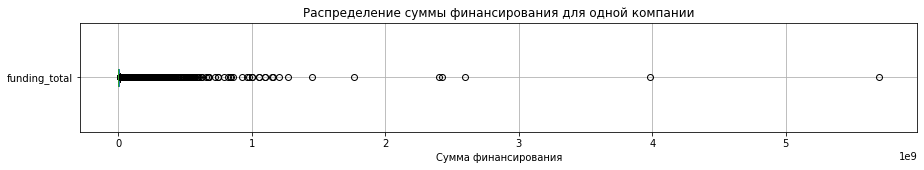

In [130]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 2))

# Строим диаграмму размаха значений в столбце funding_total
company_df.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы финансирования для одной компании')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

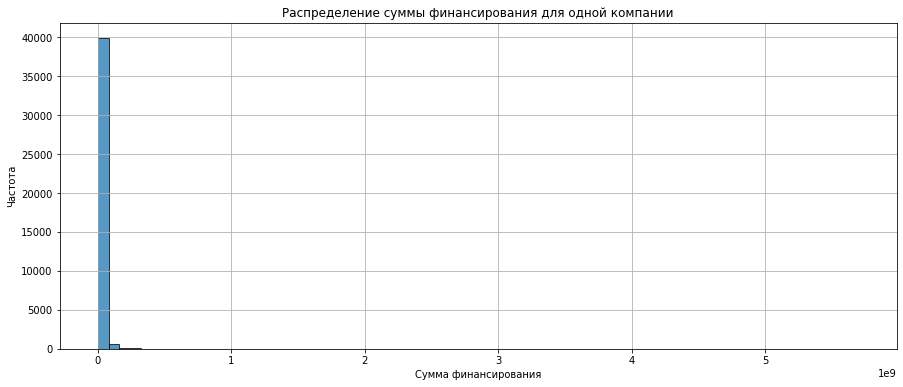

In [131]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
company_df['funding_total'].plot(
                kind='hist', # Тип графика - гистограмма
                bins = 70,
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение суммы финансирования для одной компании')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Типичной суммой финансирования для компании является 600 тыс долларов. Однако в данных мы видим выбросы в виде финансирования в 0 долларов., и у 25% финансирование равно 0 долларов. Максимальный размер финансирования составляет 5.7 триллионов долларов. Данные представлены большими значениями, и графическая визуализация данных в исходном формате является малоинформативной. 

Так как большое количество организаций получило 0 долларов, отфильтруем данные так, чтобы финансирование в 0 долларов не попадало в статистический анализ.


<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Хорошо, распределения по всем данным верно построены.

Из-за наличия выбросов графики получаются полохочитаемыми. Дополнительно можно построить графики без выбросов. Для ящика с усами это сделать проще всего, задав параметр showfliers = False
</div>

In [132]:
# Проводим фильтрацию, выделяем компании, у которых ненулевая сумма финансирования 
df_not_zero = company_df[(company_df['funding_total'] > 0)]
df_not_zero.info()
df_not_zero.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27874 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         27874 non-null  int64         
 1   name               27874 non-null  object        
 2   category_code      26857 non-null  object        
 3   status             27874 non-null  object        
 4   founded_at         21750 non-null  datetime64[ns]
 5   closed_at          1770 non-null   datetime64[ns]
 6   domain             26490 non-null  object        
 7   network_username   16633 non-null  object        
 8   country_code       26270 non-null  object        
 9   investment_rounds  27874 non-null  int64         
 10  funding_rounds     27874 non-null  int64         
 11  funding_total      27874 non-null  int64         
 12  milestones         27874 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 3.0+

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000,3
21,10015,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,5,68069200,0
26,100155,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0,3,10125300,1
32,10018,Demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,Demandbase,USA,0,3,33000000,3



<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Да, верно, что ты отфильтровала и рассмотрела отдельно положительные значения.    
</div>

In [133]:
# Выводим статистические показатели для столбца funding_total датафрейма df_not_zero
df_not_zero['funding_total'].describe()

count    2.787400e+04
mean     1.481652e+07
std      6.775936e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.564500e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

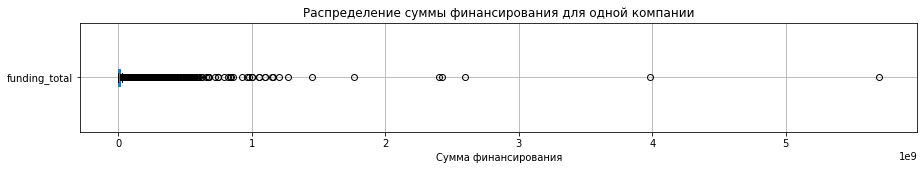

In [134]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 2))

# Строим диаграмму размаха значений в столбце funding_total
df_not_zero.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы финансирования для одной компании')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

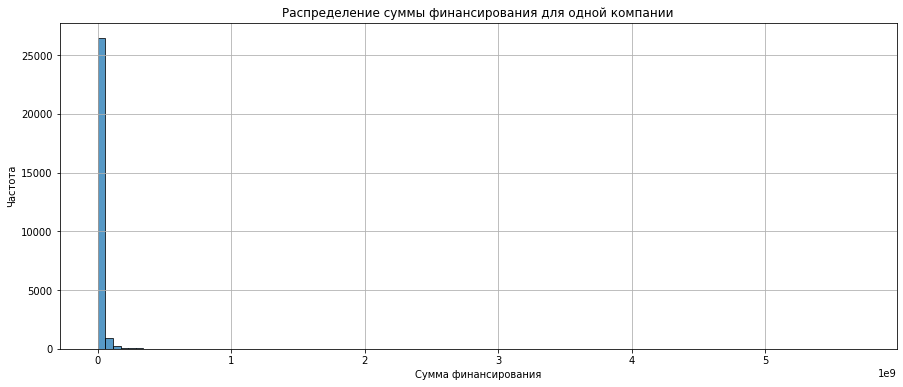

In [135]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_not_zero['funding_total'].plot(
                kind='hist', # Тип графика - гистограмма
                bins = 100,
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение суммы финансирования для одной компании')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Теперь мы видим, что минимальная сумма финансирования составляет 291 долларов, а максимальная - 5.7 триллионов долларов. Мода значений равна 2,5 млн долларов. 

График всё ещё не выглядит наглядно из-за аномальных выбросов. Проведём фильтрацию, в датафрейме оставим компании с ненулевым финансированием и с финансированием, не превышающем 1 млрд долларов.

In [136]:
# Проводим фильтрацию, удаляем аномально высокие суммы финансирования
df_not_zero = company_df[(company_df['funding_total'] > 0) & (company_df['funding_total'] < 1000000000)]
df_not_zero.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000,3
21,10015,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,5,68069200,0
26,100155,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0,3,10125300,1
32,10018,Demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,Demandbase,USA,0,3,33000000,3



<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Хорошо, здесь ты попыталась убрать выбросы, которые немного мешают нам разглядеть графики.

Но, такая небольшая фильтрация все же не оказывает решающего эффекта.

Для типичного же значения стоит смотреть на медиану, а она мало подвержена выбросам. 

Поэтому желаемого эффекта мы как будто не получили.
</div>

In [137]:
# Выводим статистические показатели для столбца funding_total датафрейма df_not_zero
df_not_zero['funding_total'].describe()

count    2.785700e+04
mean     1.369799e+07
std      3.997610e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.551000e+06
75%      1.100000e+07
max      9.800000e+08
Name: funding_total, dtype: float64

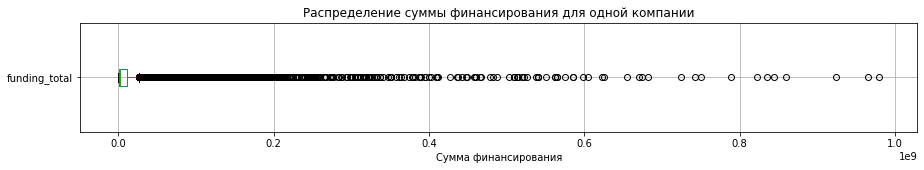

In [138]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 2))

# Строим диаграмму размаха значений в столбце funding_total
df_not_zero.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы финансирования для одной компании')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

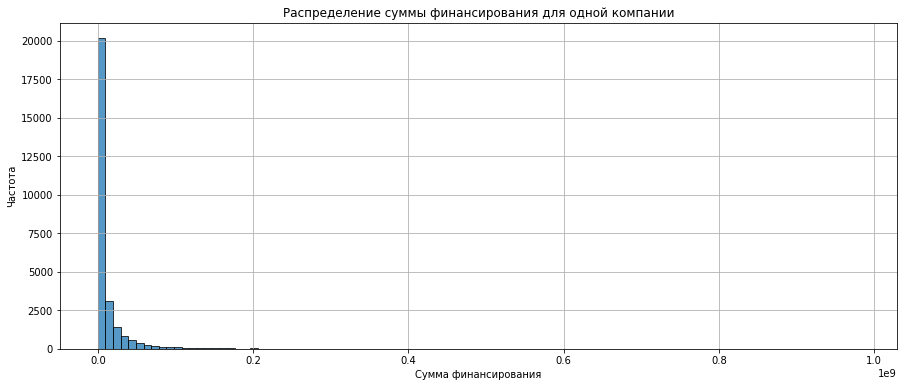

In [139]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_not_zero['funding_total'].plot(
                kind='hist', # Тип графика - гистограмма
                bins = 100,
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение суммы финансирования для одной компании')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

График стал более наглядным. Мода значений равна 2,5 млн долларов. Выбросы всё так же смещены вправо, что указывает на ненормированное распределение финансирования в сторону увеличения суммы финансирования. Выбивающиеся значения начинаются с 1 млрд долларов. 

Таким образом, типичная сумма финансирования составляет 2,5 млн долларов.


<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

В целом по этому распределению все верно отмечено. 
</div>


### 3.3. Куплены забесплатно?

Исследуем компании, которые были куплены за ноль или за один доллар. Для анализа выберем те компании, у которых был ненулевой общий объём финансирования.

In [140]:
# Проведём объединение датафреймов acquisition_df и company_df. Для how установим параметр 'left'
df_zero_amount = acquisition_df.merge(company_df, left_on='acquired_company_id', right_on='company_id', how='left') 
df_zero_amount.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,11,10,NaN,20000000,2007-05-30,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
1,7,59,72,cash,60000000,2007-07-01,72.0,GrandCentral,mobile,acquired,2006-04-01,NaT,grandcentral.com,NaN,USA,0.0,1.0,4000000.0,4.0
2,8,24,132,cash,280000000,2007-05-01,132.0,Last.fm,music,acquired,2002-01-01,NaT,last.fm,lastfm,GBR,0.0,1.0,5000000.0,5.0
3,9,59,155,cash,100000000,2007-06-01,155.0,FeedBurner,web,acquired,2004-02-01,NaT,feedburner.com,FeedBurner,USA,0.0,2.0,8000000.0,4.0
4,10,212,215,cash,25000000,2007-07-01,215.0,Recipezaar,web,acquired,1999-09-01,NaT,recipezaar.com,NaN,USA,0.0,0.0,0.0,0.0


In [141]:
# Выбираем данные компаний, у которых в столбце price_amount значение 0 или 1 и funding total (сумма финансирования) > 0 и для которых статус равен acquired
df_zero_amount = df_zero_amount[((df_zero_amount['price_amount'] == 0) | (df_zero_amount['price_amount'] == 1)) & (df_zero_amount['funding_total'] > 0) & (df_zero_amount['status'] == 'acquired')]
df_zero_amount.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
7,14,318,314,cash,0,2006-10-01,314.0,Reddit,web,acquired,2005-01-01,NaT,reddit.com,reddit,USA,0.0,1.0,100000.0,3.0
49,65,146,698,cash,0,2007-08-01,698.0,Maya's Mom,web,acquired,NaT,NaT,mayasmom.com,NaN,USA,0.0,1.0,1000000.0,2.0
51,67,156,718,cash,0,2007-08-01,718.0,Glimpse,ecommerce,acquired,NaT,NaT,glimpse.com,NaN,USA,0.0,1.0,4000000.0,0.0
65,87,1035,175,cash,0,2007-10-01,175.0,Newsvine,web,acquired,2005-03-31,NaT,newsvine.com,NaN,USA,0.0,1.0,1250000.0,0.0
85,115,396,1582,cash,0,2007-12-01,1582.0,BeliefNet,web,acquired,2008-01-01,NaT,beliefnet.com,eliefnet,USA,0.0,1.0,7000000.0,3.0



<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Дополнительно можно было проверить, что все компании куплены, т.е. в статуса aquired.  
</div>

In [142]:
# Выведем информацию об объединённом датафрейме
df_zero_amount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 7 to 9391
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1618 non-null   int64         
 1   acquiring_company_id  1618 non-null   int64         
 2   acquired_company_id   1618 non-null   int64         
 3   term_code             121 non-null    object        
 4   price_amount          1618 non-null   int64         
 5   acquired_at           1614 non-null   datetime64[ns]
 6   company_id            1618 non-null   float64       
 7   name                  1618 non-null   object        
 8   category_code         1553 non-null   object        
 9   status                1618 non-null   object        
 10  founded_at            1285 non-null   datetime64[ns]
 11  closed_at             13 non-null     datetime64[ns]
 12  domain                1546 non-null   object        
 13  network_username  

In [143]:
# Посчитаем долю проданных за 0 или за 1 доллар компаний относительно всех компаний (в процентах)
percent_zero_amount = len(df_zero_amount['id']) / len(acquisition_df['acquired_company_id']) * 100
percent_zero_amount

17.199957478473475

17% компаний были проданы за 0 или за 1 доллар, при этом каждая из них получила ненулевой объём финансирования.

In [144]:
# Выводим статистические показатели для столбца funding_total датафрейма df_zero_amount
df_zero_amount['funding_total'].describe()

count    1.618000e+03
mean     1.815296e+07
std      1.445030e+08
min      3.750000e+03
25%      2.000000e+06
50%      6.000000e+06
75%      1.550000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

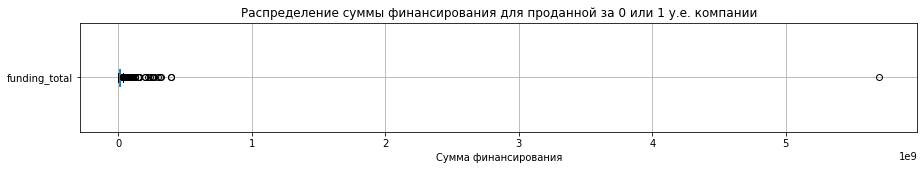

In [145]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 2))

# Строим диаграмму размаха значений в столбце funding_total
df_zero_amount.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы финансирования для проданной за 0 или 1 у.е. компании')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

Минимальная сумма финансирования для проданных за 0 или за 1 доллар компаний составляет 3750 долларов, максимальная - 5.7 триллионов долларов. Мода суммы финансирования равна 6 млн долларов. Таким образом, компании получили достаточно большую сумму финансирования, но по какой-то причине были проданы всего за 0 или за 1 доллар.  

In [146]:
# Считаем первый квартиль для столбца funding_total
df_zero_amount['funding_total'].quantile(0.25)

2000000.0

In [147]:
# Считаем третий квартиль для столбца funding_total
df_zero_amount['funding_total'].quantile(0.75)

15500000.0

In [148]:
# Вычислим межквартильный размах (IQR)
IQR = df_zero_amount['funding_total'].quantile(0.75) - df_zero_amount['funding_total'].quantile(0.25)
IQR

13500000.0

In [149]:
# Считаем нижнюю границу выбросов 
lower = df_zero_amount['funding_total'].quantile(0.25) - 1.5 * IQR
lower

-18250000.0

In [150]:
# Считаем верхнюю границу выбросов 
upper = df_zero_amount['funding_total'].quantile(0.75) + 1.5 * IQR
upper

35750000.0

In [151]:
# Создаём датафрейм из значений верхней и нижней границы выбросов
df = pd.DataFrame([lower, upper])
df.head()

,0
0,-18250000.0
1,35750000.0



<div class="alert alert-danger">
    
**Комментарий ревьюера - 3**

**#ошибка**

Ты верно получило границы выбросов.

Давай посмотрим, какой процент данных фильтрует верхняя граница (нижняя очевидно не так интересна) и посмотрим какому перцентилю она соответствует.
</div>

In [152]:
# Выбираем данные компаний, у которых в столбце funding_total значение выше верхней границы выбросов
df_zero_amount_upper = df_zero_amount[df_zero_amount['funding_total'] > 35750000]
df_zero_amount_upper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 282 to 9341
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    147 non-null    int64         
 1   acquiring_company_id  147 non-null    int64         
 2   acquired_company_id   147 non-null    int64         
 3   term_code             8 non-null      object        
 4   price_amount          147 non-null    int64         
 5   acquired_at           147 non-null    datetime64[ns]
 6   company_id            147 non-null    float64       
 7   name                  147 non-null    object        
 8   category_code         146 non-null    object        
 9   status                147 non-null    object        
 10  founded_at            115 non-null    datetime64[ns]
 11  closed_at             1 non-null      datetime64[ns]
 12  domain                145 non-null    object        
 13  network_username 

In [153]:
# Проанализируем статистические данные столбца funding_total 
df_zero_amount_upper['funding_total'].describe()

count    1.470000e+02
mean     1.166116e+08
std      4.688198e+08
min      3.580000e+07
25%      4.322175e+07
50%      5.400000e+07
75%      7.125000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

147 компаний, согласно данным в столбце funding_total, получили финансирование выше 35 750 000 долларов, что превышает верхнюю границу выбросов. Минимальная сумма финансирования для таких компаний составляет 35 800 000 долларов, а максимальная - 5 700 000 000 долларов. Мода значений - 54 000 000 долларов. 

In [154]:
# Найдём процент компаний, для которых сумма финансирования выходит за верхнюю границу выбросов
percent_upper = len(df_zero_amount_upper) / len(df_zero_amount) * 100
percent_upper

9.085290482076639

In [155]:
# Найдём значение перцентиля для верхней границы в датафрейме df_zero_amount
import numpy as np
value = 35750000
sorted_df_zero_amount = np.sort(df_zero_amount['funding_total'])
position = np.searchsorted(sorted_df_zero_amount, value)
percentile = (position / len(sorted_df_zero_amount)) * 100
percentile

90.91470951792337

Значение верхней границы выбросов соответствует 90-му персентилю в датафрейме с информацией о компаниях, у которых ненулевой объём финансирования и которые были проданы за 0 или 1 доллар. То есть около 10% информации о сумме финансирования относится к выбросам данных.

<div class="alert alert-success">
    
**Комментарий ревьюера - 4**

**#ок**

Отлично.

</div>

Нижняя граница выбросов в данных столбца с информацией о суммах финансирования равна -18 250 000, верхняя граница равна 35 750 000. Первый квартиль для границ равен -4 750 000, третий квартиль равен 22 250 000. В датафрейме df_zero_amount есть значения, которые выходят за рамки границ выбросов, и их можно считать аномалиями и ошибками в данных. Для более детального анализа значения, выходящие за верхнюю и нижнюю границы выбросов можно отфильтровать или удалить.


<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**

Здесь нужно рассчитать аналитически верхнюю и нижнюю границу выбросов для столбца funding_total и указать, каким процентилям границы соответствуют.   
    
Давай дополним.
</div>


### 3.4. Цены стартапов по категориям

Среди категорий стартапов выделим категории стартапов, характеризующиеся:
- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

In [157]:
# Проведём объединение датафреймов acquisition_df и company_df. Для how установим параметр 'left'
df_not_zero_price = acquisition_df.merge(company_df, left_on='acquired_company_id', right_on='company_id', how='left') 
df_not_zero_price.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,11,10,NaN,20000000,2007-05-30,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
1,7,59,72,cash,60000000,2007-07-01,72.0,GrandCentral,mobile,acquired,2006-04-01,NaT,grandcentral.com,NaN,USA,0.0,1.0,4000000.0,4.0
2,8,24,132,cash,280000000,2007-05-01,132.0,Last.fm,music,acquired,2002-01-01,NaT,last.fm,lastfm,GBR,0.0,1.0,5000000.0,5.0
3,9,59,155,cash,100000000,2007-06-01,155.0,FeedBurner,web,acquired,2004-02-01,NaT,feedburner.com,FeedBurner,USA,0.0,2.0,8000000.0,4.0
4,10,212,215,cash,25000000,2007-07-01,215.0,Recipezaar,web,acquired,1999-09-01,NaT,recipezaar.com,NaN,USA,0.0,0.0,0.0,0.0


In [158]:
# Исключаем данные компаний, у которых в столбце price_amount значение 0 
df_not_zero_price = df_not_zero_price[df_not_zero_price['price_amount'] > 0]
df_not_zero_price.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,11,10,NaN,20000000,2007-05-30,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
1,7,59,72,cash,60000000,2007-07-01,72.0,GrandCentral,mobile,acquired,2006-04-01,NaT,grandcentral.com,NaN,USA,0.0,1.0,4000000.0,4.0
2,8,24,132,cash,280000000,2007-05-01,132.0,Last.fm,music,acquired,2002-01-01,NaT,last.fm,lastfm,GBR,0.0,1.0,5000000.0,5.0
3,9,59,155,cash,100000000,2007-06-01,155.0,FeedBurner,web,acquired,2004-02-01,NaT,feedburner.com,FeedBurner,USA,0.0,2.0,8000000.0,4.0
4,10,212,215,cash,25000000,2007-07-01,215.0,Recipezaar,web,acquired,1999-09-01,NaT,recipezaar.com,NaN,USA,0.0,0.0,0.0,0.0


In [159]:
# Создадим сводную таблицу, в которой выделим категории области деятельности компании и посчитаем медиану и стандартное отклонение стоимости стартапа
print('Категории стартапов:')
pivot_startup = pd.pivot_table(df_not_zero_price, index="category_code", values="price_amount", aggfunc=['median', 'std'])

print(pivot_startup)

Категории стартапов:
                       median           std
                 price_amount  price_amount
category_code                              
advertising          60000000  4.954839e+08
analytics           200000000  9.296774e+07
automotive         2400000000  2.581669e+09
biotech             200000000  1.968195e+09
cleantech           185000000  8.744196e+08
consulting           32150000  1.018109e+09
ecommerce           157500000  2.814255e+08
education            16250000  2.883294e+08
enterprise           54750000  2.413581e+11
fashion             195000000  8.649422e+07
finance             171500000  1.052920e+09
games_video          58250000  1.463478e+09
hardware             76000000  6.450874e+08
health              140000000  1.927100e+09
hospitality          57500000  7.906006e+08
local                16140200           NaN
manufacturing       351000000  1.060435e+09
medical             165000000  1.659058e+08
messaging           100000000  6.907460e+07
mobile     

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Верные статистические функции использованы.

</div>

In [160]:
# Выводим названия столбцов сводной таблицы для фильтрации данных
pivot_startup.columns

MultiIndex([('median', 'price_amount'),
            (   'std', 'price_amount')],
           )

In [161]:
# Сортируем данные по стоимости стартапа в порядке убывания и выбираем топ-15 из них
top_category = pivot_startup.sort_values(by=('median', 'price_amount'), ascending=False).head(15)
top_category = top_category.reset_index()
top_category

,category_code,median,std
,,price_amount,price_amount
0,automotive,2400000000,2.581669e+09
1,sports,622500000,5.126524e+08
2,nanotech,584000000,NaN
3,real_estate,400000000,2.676302e+09
4,manufacturing,351000000,1.060435e+09
5,transportation,230000000,5.726255e+08
6,biotech,200000000,1.968195e+09
7,analytics,200000000,9.296774e+07
8,fashion,195000000,8.649422e+07


<Figure size 1440x720 with 0 Axes>

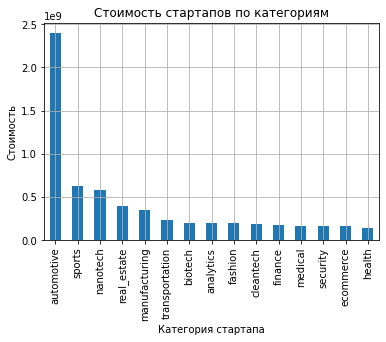

In [162]:
# Создаём визуализацию 
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
top_category.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               x='category_code', 
               y=('median', 'price_amount'),
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Стоимость стартапов по категориям'
)

# Настраиваем оформление графика
plt.xlabel('Категория стартапа')
plt.ylabel('Стоимость')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Отлично, топ по стоимости верно получен и наглядно отображен.

</div>

Самые дорогостящие стартапы относятся к категории automotive (стоимость - 2 400 000 000 долларов). Из ТОП-15 самых дорогих по стоимости стартапов наименьшую стоимость имеют стартапы категории health (140 000 000 долларов). 

<Figure size 1440x720 with 0 Axes>

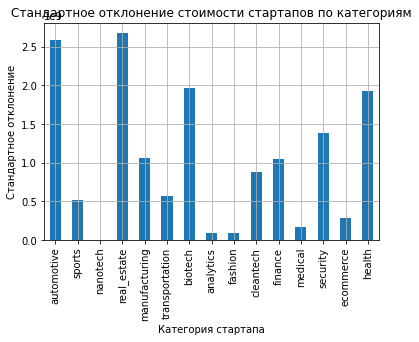

In [163]:
# Создаём визуализацию 
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
top_category.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               x='category_code', 
               y=('std', 'price_amount'),
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Стандартное отклонение стоимости стартапов по категориям'
)

# Настраиваем оформление графика
plt.xlabel('Категория стартапа')
plt.ylabel('Стандартное отклонение')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Из ТОП-15 самых дорогостоящих стартапов наибольший разброс цены приходится на категорию "real_estate". Также высокими считаются показатели стандартного отклонения в категориях "automotive", "biotech" и "health". Стандартное отклонение стоимости для этих категорий колеблется от 1.9 млрд долларов до 2.6 млрд долларов. 

<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**

Давай все же отдельно рассмотрим топ по стандартному отклоненияю, не зависимо от первого топа по самой цене стартапа.
</div>

In [164]:
# Сортируем данные по стандартному отклонению стоимости стартапа в порядке убывания и выбираем топ-15 из них
top_std = pivot_startup.sort_values(by=('std', 'price_amount'), ascending=False).head(15)
top_std = top_std.reset_index()
top_std

,category_code,median,std
,,price_amount,price_amount
0,enterprise,54750000,2.413581e+11
1,public_relations,110000000,6.854338e+09
2,real_estate,400000000,2.676302e+09
3,automotive,2400000000,2.581669e+09
4,other,71550000,2.060861e+09
5,biotech,200000000,1.968195e+09
6,health,140000000,1.927100e+09
7,games_video,58250000,1.463478e+09
8,security,164500000,1.378442e+09


<Figure size 1440x720 with 0 Axes>

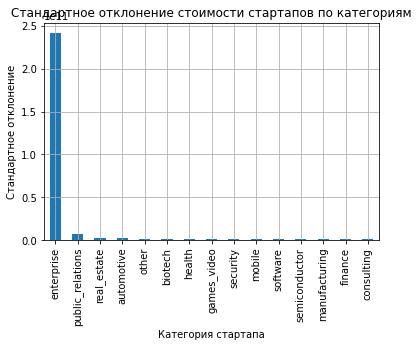

In [165]:
# Создаём визуализацию 
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
top_std.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               x='category_code', 
               y=('std', 'price_amount'),
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Стандартное отклонение стоимости стартапов по категориям'
)

# Настраиваем оформление графика
plt.xlabel('Категория стартапа')
plt.ylabel('Стандартное отклонение')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

<div class="alert alert-success">
    
**Комментарий ревьюера - 3**

**#ок**

Все верно.

</div>

Компании с самым высоким стандартным отклонением стоимости находятся в категории enterprise - для них стандартное отклонение стоимости равно 241.36 млрд долларов. Делаем вывод, что в этой категории есть компании, которые имели как очень высокую стоимость, так и сравнительно более низкую. Именно в этой категории компаний есть наибольший риск продать компанию как за крупную сумму, так и за низкую стоимость. 


### 3.5. Сколько раундов продержится стартап перед покупкой

Проанализируем столбец `funding_rounds` и выведем типичное значение количества раундов для каждого возможного статуса стартапа.

In [166]:
# Проведём фильтрацию значений и выберем только те компании, у которых количество раундов больше 0
df_rounds = company_df[company_df['funding_rounds'] > 0]
df_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000,3
20,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0,4
21,10015,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,5,68069200,0
26,100155,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0,3,10125300,1


In [167]:
# Выводим статистические показатели для столбца funding_rounds датафрейма df_rounds
df_rounds['funding_rounds'].describe()

count    31707.000000
mean         1.659760
std          1.201666
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

Обычно у компании проходит всего один раунд финансирования. Максимальное количество раундов финансирования равно 15, минимальное - 1. Среднее значение и медиана незначительно отличаются между собой, поэтому для оценки будем использовать именно среднее значение.

In [168]:
# Создадим сводную таблицу, в которой выделим среднее количество этапов финансирования для компаний с разным статусом
print('Количество раундов финансирования:')
pivot_rounds = pd.pivot_table(df_rounds, index='status', values="funding_rounds", aggfunc='mean').reset_index()
print(pivot_rounds)

Количество раундов финансирования:
      status  funding_rounds
0   acquired        1.896645
1     closed        1.383437
2        ipo        2.526531
3  operating        1.642359


<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**

Для начала давай отфильтруем только компании, которые в принципе проходили через финансирование по раундам, т.е. у которых количество раундов больше 0.


Также давай для наглядности посмотрим именно среднее арифметическое. здесь разброс показателей не такой большой, поэтому именно mean будет более информативно.
</div>

<Figure size 1440x432 with 0 Axes>

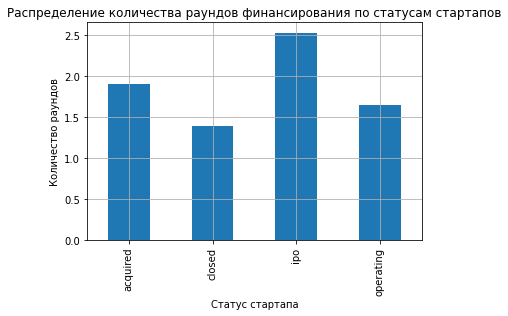

In [169]:
# Создаём визуализацию 
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
pivot_rounds.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               x='status', 
               y='funding_rounds',
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества раундов финансирования по статусам стартапов'
)

# Настраиваем оформление графика
plt.xlabel('Статус стартапа')
plt.ylabel('Количество раундов')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

<div class="alert alert-success">
    
**Комментарий ревьюера - 3**

**#ок**

Хорошо, теперь все верно, но стоило и здесь отсортировать столбики на графике.

</div>

Для компаний со статусом ipo проходит наибольшее количество раундов финансирования - в среднем 2.5 раунда. Для компаний со статусом closed проходит наименьшее количество раундов финансирования - в среднем 1.3. Перед продажей стартап проходят около 1.9 раундов (то есть почти два раза стартапы получают финансирование и затем продаются).


## Шаг 4. Итоговый вывод и рекомендации

В ходе исследования были проанализированы данные стартапов. Всего для анализа было использовано 5 датафреймов. Датафреймы включали информацию о покупках одними компаниями других компаний, информацию о компаниях и раундах финансирования, информацию об образовании сотрудника, информацию о сотрудниках и информацию о типе образования сотрудника. В ходе исследования было принято решенеи разделить датафрейм с информацией о компаниях и раундах финансирования на два самостоятельных датафрейма. Акцент исследования был на том, чтобы оценить релевантность имеющейся информации для разработки модели бизнеса. 

Исследование показало, информация об образовании сотрудников содержится не в полном объёме - для 84% сотрудников нет информации с указанием их работы в какой-либо компании. Остальные данные могут быть использованы для анализа особенностей страртапов. Были выявлены аномальные значения стоимости стартапов - около 17% компаний были проданы за 0 или 1 доллар. Типичная сумма финансирования для стартапов составляет 2,5 млн долларов. В ходе исследования были выявлены топ-15 категорий стартапов, которые продаются за самую высокую стоимость. Критерий формирования топ-15 - типичная стоимость стартапа в категории. Также в ходе исследования выявили топ-15 категорий компаний с наибольшим стандартным отклонением стоимости компаний. Критерий формирования топ-15 - значение стандартного отклонения в категории (в порядке убывания). Перед продажей стартап получает около двух финансирований. 

В дальнейшем эти данные могут быть использованы для более детального анализа и разработки модели бизнеса.

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Я бы рекомендовала делать итоговые выводы более развернутыми, чтобы они отражали полный объем работы над проектом, начиная с предобработки и по всем остальным вопросам.

Технически ты отлично справляешься, материал хорошо освоен и проект хорошо проработан. Но в некоторых вопросах есть небольшие, но принципиальные моменты, которые не были учтены. Давай поправим небольшие неточности, чтобы проет был принят.

Уверена, ты легко с этим справишься.
</div>